In [87]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [88]:
list_file = 'annotations/list.txt'


In [89]:
df=pd.read_csv(list_file,header=None,sep=' ', names=['images','class','species','breed_id'])
df

,images,class,species,breed_id
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [90]:
df['label'] = df['species'].map({1: 0, 2: 1}) 

In [91]:
def load_images(images_path, annotations):
    X, y = [], []

    for _, row in annotations.iterrows():
        img_name = row['images']
        img_path = os.path.join(images_path, img_name + ".jpg")
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, (32, 32))  
            X.append(img)
            y.append(row['label'])
    return np.array(X), np.array(y)

In [92]:
X,y=load_images('images',df)

In [93]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [94]:
X = X.reshape(X.shape[0], -1)

In [113]:
X = X / 255.0 

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [116]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [117]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)

LogisticRegression()

In [118]:
y_pred = model.predict(X_test_pca)

In [119]:
# Predict on test set
accuracy = accuracy_score(y_test, y_pred)


print(f"Test Accuracy: {accuracy * 100:.2f}%")



Test Accuracy: 67.89%


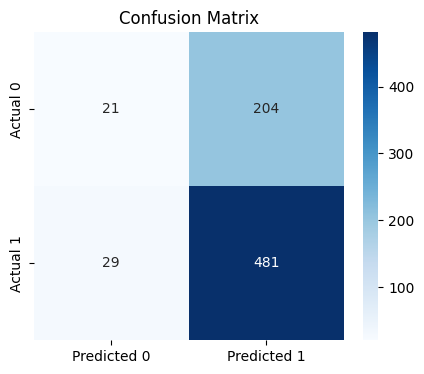

In [102]:
from sklearn.metrics import  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
conf_matrix_df = pd.DataFrame(cm, index=[f"Actual {i}" for i in range(len(cm))], columns=[f"Predicted {i}" for i in range(len(cm))])
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [103]:

for label in np.unique(y_train):
    print(f"Number of training examples for class {label}: {sum(np.array(y_train) == label)}")

for label in np.unique(y_test):
    print(f"Number of testing examples for class {label}: {sum(np.array(y_test) == label)}")

Number of training examples for class 0: 2146
Number of training examples for class 1: 4468
Number of testing examples for class 0: 225
Number of testing examples for class 1: 510


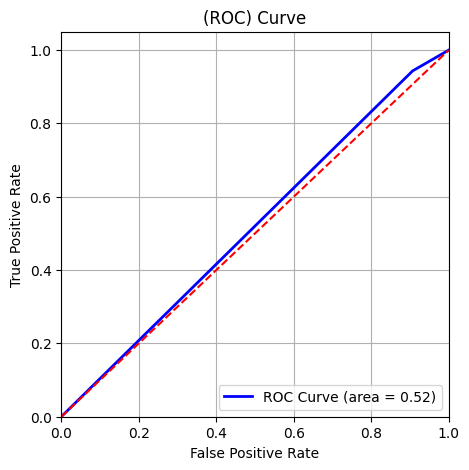

In [104]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)  # Calculate the area under the ROC curve

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [105]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)

# Step 7: Print the AUC score
print(f'AUC Score: {auc_score:.2f}')

AUC Score: 0.52


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8918530588737994..1.867556271645722].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9031473904730216..1.155600461216464].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.981802874407354..2.02036288793194].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6833961420256012..2.315763476626565].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7561752374377582..1.4345511089175595].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6646475939634613..2.25468477737592].
Clipping input data to the val

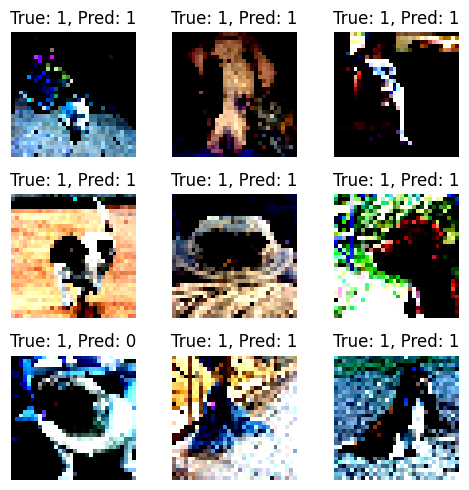

In [106]:
num_images = 9
random_indices = np.random.choice(len(X_test), size=num_images, replace=False)

# Create a figure to display the images
plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(32, 32, 3), cmap='gray')  # Assuming images are RGB
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [107]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2)

knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [108]:
Y_pred = knn.predict(X_test_pca)

In [109]:

accuracy = accuracy_score(y_test, Y_pred)

print(f"Test Accuracy: {accuracy * 100:.2f}%")



Test Accuracy: 65.58%


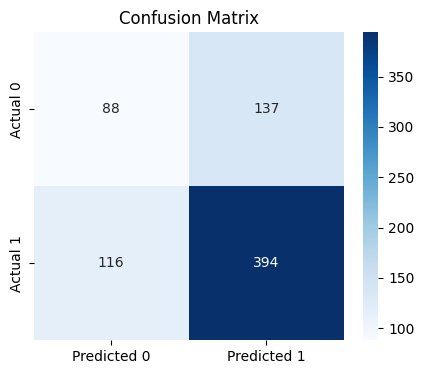

In [110]:
from sklearn.metrics import  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# Display the confusion matrix
conf_matrix_df = pd.DataFrame(cm, index=[f"Actual {i}" for i in range(len(cm))], columns=[f"Predicted {i}" for i in range(len(cm))])
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


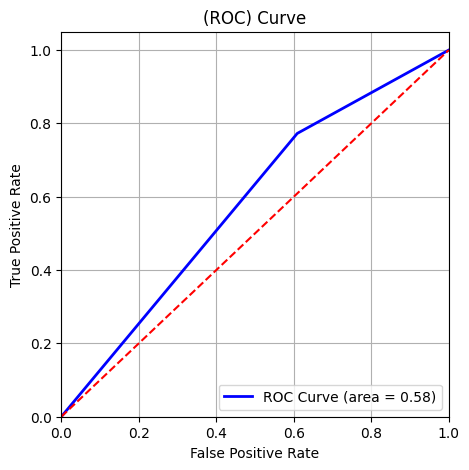

In [111]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, Y_pred)
roc_auc = auc(fpr, tpr)  # Calculate the area under the ROC curve

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [112]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, Y_pred)

# Step 7: Print the AUC score
print(f'AUC Score: {auc_score:.2f}')

AUC Score: 0.58
